Install Dependencies

In [2]:
!pip install pypi
!pip install sktime
!pip install pmdarima
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pypi: filename=pypi-2.1-py3-none-any.whl size=1354 sha256=9a7d87dec6a454ddd0f764fff8bd89c0456c9f2ef3b8ac7ab6b19f1b9d1815e0
  Stored in directory: /root/.cache/pip/wheels/6e/bb/35/2b31808160dec7d2186ec14eca0b52c3f5a337d1aa40d87f59
Successfully built pypi
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 53.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.9 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully unins

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly as pt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import mplcyberpunk
# from stldecompose import decompose

import os
import sys

%matplotlib inline

In [4]:
data = pd.read_csv('/content/LOB_data.csv')

In [5]:
data = data.copy().iloc[:]
data = data.reset_index()
data

,index,timestamp,mid_price,bid_price,ask_price,bid_liq_.002,bid_liq_.0033,bid_liq_.01,bid_liq_.03,bid_liq_.05,...,ask_liq_.0033,ask_liq_.01,ask_liq_.03,ask_liq_.05,dir,spread,log_ret_ask,log_ret_bid,sma,ema
0,0,"12_26_2022,01_20_08",16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,1.079406e+10,4.175698e+10,5.327345e+10,...,1.428574e+09,1.015276e+10,4.871631e+10,9.206687e+10,0,-10.00,0.000000,0.000000,0.0,0.000000
1,1,"12_26_2022,01_20_18",16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,1.079406e+10,4.175698e+10,5.327345e+10,...,1.428574e+09,1.015276e+10,4.871631e+10,9.206687e+10,0,-10.00,0.000000,0.000000,0.0,0.000000
2,2,"12_26_2022,01_21_41",16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,1.079406e+10,4.175698e+10,5.327345e+10,...,1.428574e+09,1.015276e+10,4.871631e+10,9.206687e+10,0,-10.00,0.000000,0.000000,0.0,0.000000
3,3,"12_26_2022,01_22_11",16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,1.079406e+10,4.175698e+10,5.327345e+10,...,1.428574e+09,1.015276e+10,4.871631e+10,9.206687e+10,0,-10.00,0.000000,0.000000,0.0,0.000000
4,4,"12_26_2022,01_22_41",16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,1.079406e+10,4.175698e+10,5.327345e+10,...,1.428574e+09,1.015276e+10,4.871631e+10,9.206687e+10,0,-10.00,0.000000,0.000000,16830.0,16830.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359,2359,"12_26_2022,21_00_41",16882.5,16897.0,16889.75,6.754584e+10,6.894599e+10,7.717633e+10,1.086895e+11,1.212712e+11,...,1.540508e+09,4.702479e+09,4.325110e+10,9.331184e+10,0,-7.25,-0.000044,-0.000089,16882.4,16882.079848
2360,2360,"12_26_2022,21_01_11",16882.5,16897.0,16889.75,6.753571e+10,6.893586e+10,7.716620e+10,1.086793e+11,1.212611e+11,...,1.550646e+09,4.712617e+09,4.326124e+10,9.332198e+10,0,-7.25,0.000000,0.000000,16882.5,16882.219899
2361,2361,"12_26_2022,21_01_41",16882.5,16897.0,16889.75,6.753571e+10,6.893586e+10,7.716620e+10,1.086793e+11,1.212611e+11,...,1.550646e+09,4.712617e+09,4.326124e+10,9.332198e+10,0,-7.25,0.000000,0.000000,16882.5,16882.313266
2362,2362,"12_26_2022,21_02_11",16882.5,16897.0,16889.75,6.753571e+10,6.893586e+10,7.716620e+10,1.086793e+11,1.212611e+11,...,1.550646e+09,4.712617e+09,4.326124e+10,9.332198e+10,0,-7.25,0.000000,0.000000,16882.5,16882.375511


# Models

*   I am going to work with 2 models for predictions, an LSTM and XGB model, compared to a baseline exponential smoothing and ARIMA model
  * The exponential smoothing model is a common time-series analysis method which is fairly simple to implement
  * NOTE: These baseline models perform best with "stationary" data. In this case, we do NOT have stationary data, but these are probably still the best baseline performers
*   Based on my research it seems XGBoost models and Prophet models perform best
  * However, LSTMs are very popular so I am implementing a ***LSTM model and XGB model***



# Baseline Models

*   We want to use common statistical models as a baseline for comparison
*   These are univariate models based solely on the price
  * On the contrary, we want to use more complex models (later in notebook) that let us use multivariate inputs to see if these can perform better



## Exponential Smoothing Model

### Data Preparation for Exponential Smoothing



In [6]:
exp_data = data.copy()
exp_data = exp_data['mid_price']

exp_split = 10

test_exp_data = exp_data.copy().iloc[-exp_split:]
exp_data = exp_data.iloc[:-exp_split]

### Exponential Smoothing Model Implementation

*   Exponential smoothing is a common statistical method used for time series analysis that uses the exponential weighted average of past prices
*   An exponential smoothing model is univariate, only using one dimensional data as an input
*   We use a DES(Double Exponential Smoothing) Model that takes into account general trends of the univariate data
    * Also known as Holt's Double Exponential Smoothing, this will essentially produce a linear trend line



<ipython-input-7-8a93dd49b4f2>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(exp_data, initialization_method="heuristic").fit(
<ipython-input-7-8a93dd49b4f2>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit2 = Holt(exp_data, initialization_method="heuristic").fit(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


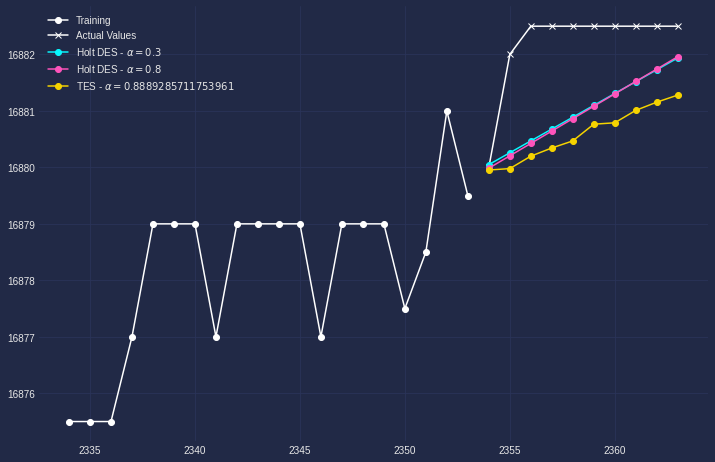

In [7]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

## DES ##
fit1 = Holt(exp_data, initialization_method="heuristic").fit(
    smoothing_level=0.3, smoothing_slope =0.1
)
fcast1 = fit1.forecast(exp_split).rename(r"Holt DES - $\alpha=0.3$")

fit2 = Holt(exp_data, initialization_method="heuristic").fit(
    smoothing_level=0.8, smoothing_slope= 0.1
)
fcast2 = fit2.forecast(exp_split).rename(r"Holt DES - $\alpha=0.8$")

## TES ##
fit3 = ExponentialSmoothing(exp_data, seasonal_periods= 5, trend= 'mul', seasonal= 'mul').fit()
fcast3 = fit3.forecast(exp_split).rename(r"TES - $\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.style.use("cyberpunk")
plt.figure(figsize=(12, 8))
(train1,) = plt.plot(exp_data[-(exp_split * 2):], marker="o", color="white")
(prediction,) = plt.plot(test_exp_data, marker = 'x', color = 'white')
(line1,) = plt.plot(fcast1, marker="o")
(line2,) = plt.plot(fcast2, marker="o")
(line3,) = plt.plot(fcast3, marker="o")
plt.legend([train1, prediction, line1, line2, line3], ['Training', 'Actual Values', fcast1.name, fcast2.name, fcast3.name])

## ARIMA Model

### Data Preparation for ARIMA Modeling


*   ARIMA modeling requires us to use "stationary" data for predictions
*   Stationary data meaning that the mean and variance are equal to 0. Tough here because of the non-stationary nature of short-time frame price movements
     * While this is not necessarily achievable, we can get a lot closer to imporve the performance



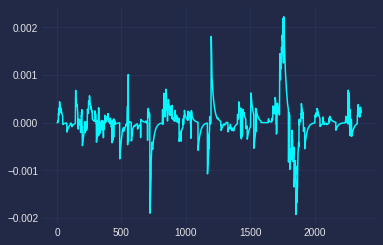

In [8]:
# from statsmodels.graphics.tsaplots import plot_predict
# from statsmodels.tsa.arima_process import arma_generate_sample
# from statsmodels.tsa.arima.model import ARIMA

np.random.seed(12345)

arima_data = data.copy()
arima_data = arima_data['mid_price']

arima_split = 10

arima_log = np.log(arima_data)

rolling_mean_exp_decay = arima_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
arima_log_exp_decay = arima_log - rolling_mean_exp_decay
arima_log_exp_decay.dropna(inplace=True)

test_arima_data = arima_log_exp_decay.copy().iloc[-arima_split:]
train_arima_data = arima_log_exp_decay.copy().iloc[:-arima_split]

plt.style.use("cyberpunk")
plt.plot(arima_log_exp_decay)



As you can see above, this data is pretty stationary, and while not perfect it should be somewhat suitable for an ARIMA baseline model

### Arima Model Implementation

In [9]:
from sktime.forecasting.arima import AutoARIMA
arima_model = AutoARIMA(suppress_warnings=True)
arima_model.fit(train_arima_data)

AutoARIMA(suppress_warnings=True)

In [10]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2354
Model:               SARIMAX(1, 0, 1)   Log Likelihood               17875.631
Date:                Sat, 07 Jan 2023   AIC                         -35745.263
Time:                        05:35:40   BIC                         -35727.971
Sample:                             0   HQIC                        -35738.966
                               - 2354                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9550   4.44e-20   2.15e+19      0.000       0.955       0.955
ma.L1         -0.1209   3.56e-19   -3.4e+17      0.000      -0.121      -0.121
sigma2      1.454e-08   7.55e-11    192.665      0.000    1.44e-08    1.47e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            373839.48
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -2.03
Prob(H) (two-sided):                  0.08   Kurtosis:                        64.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.2e+33. Standard errors may be unstable.
"""

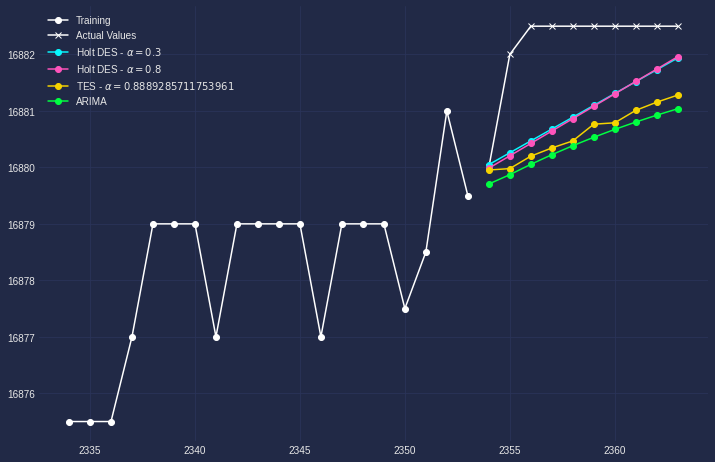

In [46]:
predictions = arima_model.predict(fh= np.arange(0,arima_split+1))
predictions_arima_log = pd.Series(rolling_mean_exp_decay.iloc[-arima_split:])
predictions_arima_log = predictions_arima_log.add(predictions)

predictions = np.exp(predictions_arima_log)
arima_predictions = predictions[1:]



plt.style.use("cyberpunk")
plt.figure(figsize=(12, 8))
(train1,) = plt.plot(exp_data[-(exp_split * 2):], marker="o", color="white")
(actual,) = plt.plot(test_exp_data, marker = 'x', color = 'white')
(line1,) = plt.plot(fcast1, marker="o")
(line2,) = plt.plot(fcast2, marker="o")
(line3,) = plt.plot(fcast3, marker="o")
(arima, ) = plt.plot(arima_predictions, marker="o")

plt.legend([train1, actual, line1, line2, line3, arima], ['Training', 'Actual Values', fcast1.name, fcast2.name, fcast3.name, 'ARIMA'])


# XGBoost and LSTM Models

## LSTMs - Recursive Approach

Intuitively, it might seem like adding a lag feature is NOT helpful. While LSTMs do use a look back algorithm that takes into account values from previous timesteps, using the lagged values as new features should produce better results.

My reasoning for this is that using them as features, allows them to be utilized in vectors which uniquely weights them. Meaning that we can assign unique weights to just the column of lag over 3 steps rather than the LSTM 

### LSTM Data Preprocessing functions

*   Squish price data for a [0,1] range
*   Building lookbacks/sequences for an LSTM Model
  *  LSTM models use sequences as inputs that have a shape in 3 dimensions - [batch size, sequence length, num features]

In [12]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#frame sequences as a supervised learning problem
def timeseries_to_supervised(data, lag):
  df = pd.DataFrame(data)
  columns = [df.shift(i) for i in range(1, lag+1)]
  columns.append(df)
  df = pd.concat(columns, axis = 1)
  return df

#create a differenced sequence
  #Calculate the difference, which will be shifted later
def difference(df, interval = 1):
  diff = list()
  for i in range(interval, len(df)):
    value = df[i] - df[i-interval]
    diff.append(value)
  return pd.Series(diff)

 #scale data using minmax scaler
def scale_data(train, test):
  scaler = MinMaxScaler(feature_range = (-1,1))
  scaler = scaler.fit(np.array(train))

  train = np.array(train).reshape(train.shape[0], train.shape[1])
  train_scaled = scaler.transform(train)

  test = np.array(test).reshape(test.shape[0], test.shape[1])
  test_scaled = scaler.transform(test)

  return scaler, train_scaled, test_scaled

#invert differenced value
def inverse_diff(history, yhat, interval = 1):
  return yhat + history[-interval]

def invert_scale(scaler, X, yhat):
  new_row = [x for x in X] + [yhat]
  array = np.array(new_row)
  array = array.reshape(1, len(array))
  inverted = scaler.inverse_transform(array)
  return inverted[0,-1]

def lookback_transformation(inputs, look_back): #incorporating lookback
  X = []
  for i in range(len(inputs) - look_back): #stop lookback(amount) before the total length
    row = [r for r in inputs[i:i+look_back, :]] #where i is 0, the value is the first 5 timesteps, with all 20 features (so 100 features)
    X.append(row)

  return np.array(X)





### LSTM Model


*   Use lookback for the LSTM model
*   Add a lag feature of 1 (Paper showing that with LSTMs, more lag is not really helpful)
*   **Our expecation** are that this model will overfit. More specifically, it seems that LSTMs have a problem where they conform to the data based on previous values, causing what is essentially a "shift" in the prediction that basically just 
  * More on this: Autoregression problems (like price prediction) seem to perform poorly on LSTMs, combined with the issue above, it's unlikely to retrieve good results from an LSTM.
* But I decided to use the LSTM anyways, because it seems to be a common model for time-series predictions 



In [13]:
#some preprocessing
data['timestamp'] = pd.to_datetime(data['timestamp'], format= '%m_%d_%Y,%H_%M_%S')
data.set_axis(data['timestamp'], inplace = True)
# data.drop(columns = ['timestamp'], inplace = True)

In [14]:
data_lstm = data.copy().iloc[:]
data_dropped = data_lstm.copy()[:].drop(['index','timestamp'],axis=1)

data_dropped

,mid_price,bid_price,ask_price,bid_liq_.002,bid_liq_.0033,bid_liq_.01,bid_liq_.03,bid_liq_.05,ask_liq_.002,ask_liq_.0033,ask_liq_.01,ask_liq_.03,ask_liq_.05,dir,spread,log_ret_ask,log_ret_bid,sma,ema
timestamp,,,,,,,,,,,,,,,,,,,
2022-12-26 01:20:08,16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,1.079406e+10,4.175698e+10,5.327345e+10,27043650.0,1.428574e+09,1.015276e+10,4.871631e+10,9.206687e+10,0,-10.00,0.000000,0.000000,0.0,0.000000
2022-12-26 01:20:18,16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,1.079406e+10,4.175698e+10,5.327345e+10,27043650.0,1.428574e+09,1.015276e+10,4.871631e+10,9.206687e+10,0,-10.00,0.000000,0.000000,0.0,0.000000
2022-12-26 01:21:41,16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,1.079406e+10,4.175698e+10,5.327345e+10,27043650.0,1.428574e+09,1.015276e+10,4.871631e+10,9.206687e+10,0,-10.00,0.000000,0.000000,0.0,0.000000
2022-12-26 01:22:11,16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,1.079406e+10,4.175698e+10,5.327345e+10,27043650.0,1.428574e+09,1.015276e+10,4.871631e+10,9.206687e+10,0,-10.00,0.000000,0.000000,0.0,0.000000
2022-12-26 01:22:41,16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,1.079406e+10,4.175698e+10,5.327345e+10,27043650.0,1.428574e+09,1.015276e+10,4.871631e+10,9.206687e+10,0,-10.00,0.000000,0.000000,16830.0,16830.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 21:00:41,16882.5,16897.0,16889.75,6.754584e+10,6.894599e+10,7.717633e+10,1.086895e+11,1.212712e+11,130374300.0,1.540508e+09,4.702479e+09,4.325110e+10,9.331184e+10,0,-7.25,-0.000044,-0.000089,16882.4,16882.079848
2022-12-26 21:01:11,16882.5,16897.0,16889.75,6.753571e+10,6.893586e+10,7.716620e+10,1.086793e+11,1.212611e+11,140512500.0,1.550646e+09,4.712617e+09,4.326124e+10,9.332198e+10,0,-7.25,0.000000,0.000000,16882.5,16882.219899
2022-12-26 21:01:41,16882.5,16897.0,16889.75,6.753571e+10,6.893586e+10,7.716620e+10,1.086793e+11,1.212611e+11,140512300.0,1.550646e+09,4.712617e+09,4.326124e+10,9.332198e+10,0,-7.25,0.000000,0.000000,16882.5,16882.313266


In [15]:
#Transformation variables
lag = 20
split = 10
look_back = 20

In [16]:
data_diff = data_dropped.copy()
#Calculate the values that we chose to shift (the return on the price)

data_supervised = timeseries_to_supervised(data_diff, lag)

data_supervised_values = data_supervised.values[lag:, :] # remove the number of rows = to the number of lag features

train_data = data_supervised_values[:-split, :]
test_data = data_supervised_values[-split:, :]

#scale all our data to be between -1 and 1
scaler, train_scaled, test_scaled = scale_data(train_data, test_data)

In [17]:
#split the data into inputs and outputs
n_input = len(data_dropped.columns)

train_x = train_scaled[:, :n_input*lag]
#create a 3 dimensional input using lookback_transformation
train_x = lookback_transformation(train_x, look_back)
train_y = train_scaled[look_back:, n_input:]

test_x = test_scaled[:, :n_input*lag]
test_y = test_scaled[:, n_input:]

print(train_x.shape, train_y.shape)

(2314, 20, 380) (2314, 380)


Model Construction

In [18]:
import keras
from keras.layers import LSTM, Dense, InputLayer, Dropout, Bidirectional
import tensorflow as tf

batch_size = 64 #ideally we would use 64, but beacuse this is a relatively small dataset, I reduced it
n_epoch = 40
validation = 0 #because this is such a short time frame and data is very stochastic, I found that using no validation set performed better on average
                  #The problem I encoutered was not overfitting, but underfitting
DROPOUT = 0.1
seed = 42

keras.utils.set_random_seed(seed) #For reproducible results


In [19]:
def fit_lstm(X_train, y_train, batch_size, n_epoch, validation):
  model = Sequential()
  model.add(InputLayer((look_back,X_train.shape[2])))
  model.add(Bidirectional(LSTM(128, activation = 'relu')))
  model.add(Dense(64, 'relu'))
  # model1.add(Dropout(rate = DROPOUT))
  model.add(Dense(32, 'relu'))
  # model1.add(Dropout(rate = DROPOUT))
  model.add(Dense((19 * lag), 'linear'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(X_train, y_train, epochs= n_epoch, batch_size= batch_size ,validation_split = validation, verbose = 1)

  return model


model = fit_lstm(train_x, train_y, batch_size, n_epoch, validation)
model.summary()

Epoch 1/40
37/37 [==============================] - 8s 132ms/step - loss: 0.2727
Epoch 2/40
37/37 [==============================] - 5s 132ms/step - loss: 0.0728
Epoch 3/40
37/37 [==============================] - 7s 188ms/step - loss: 0.0459
Epoch 4/40
37/37 [==============================] - 5s 134ms/step - loss: 0.0376
Epoch 5/40
37/37 [==============================] - 5s 135ms/step - loss: 0.0341
Epoch 6/40
37/37 [==============================] - 5s 134ms/step - loss: 0.0316
Epoch 7/40
37/37 [==============================] - 5s 133ms/step - loss: 0.0292
Epoch 8/40
37/37 [==============================] - 5s 131ms/step - loss: 0.0270
Epoch 9/40
37/37 [==============================] - 5s 134ms/step - loss: 0.0260
Epoch 10/40
37/37 [==============================] - 5s 135ms/step - loss: 0.0251
Epoch 11/40
37/37 [==============================] - 8s 219ms/step - loss: 0.0240
Epoch 12/40
37/37 [==============================] - 5s 144ms/step - loss: 0.0230
Epoch 13/40
37/37 [======

In [20]:
#There is a limitation in sklearn that makes it so inverse_transform has to be used on the SAME shape
#so instead, we redo the scaling function and get a new scaler object fitted on a 1 dimensional array to compare with the outputs
scaler_inv, dummy, dummy1 = scale_data(np.array(train_data[:,0]).reshape(-1,1), np.array(train_data[:, 0]).reshape(-1,1))
scaler_inv

MinMaxScaler(feature_range=(-1, 1))

73/73 [==============================] - 3s 36ms/step


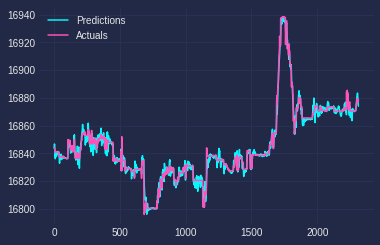

In [21]:
def plot_train_predictions(model, X, y, scaler):
  predictions = model.predict(X)
  X_results = predictions[:,0] 

  predictions = list(scaler.inverse_transform(np.array(X_results).reshape(-1,1)))
  actuals = list(scaler.inverse_transform(np.array(y).reshape(-1,1)))

  df = pd.DataFrame(data = {'Predictions':predictions, 'Actuals':actuals})
  plt.plot(df['Predictions'])
  plt.plot(df['Actuals'])
  plt.legend(['Predictions', 'Actuals'])

  return df, mean_squared_error(y, predictions)

df, mse = plot_train_predictions(model, train_x, train_y[:, 0], scaler_inv) 



### Recursive Predictions

In [22]:
data_diff = data_dropped.copy()
#Calculate the values that we chose to shift (the return on the price)

look_back = 10

data_supervised = timeseries_to_supervised(data_diff, lag)

data_supervised_values = data_supervised.values[lag:, :] # remove the number of rows = to the number of lag features

train_data = data_supervised_values[:-split-look_back-1, :]
test_data = data_supervised_values[-split-look_back-1:, :]

#scale all our data to be between -1 and 1
# scaler, train_scaled, test_scaled = scale_data(train_data, test_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

test_x = test_scaled[:, :n_input*lag]
test_y = test_scaled[:, n_input*lag:]

test_x.shape, test_y.shape

((21, 380), (21, 19))

1/1 [==============================] - 0s 20ms/step


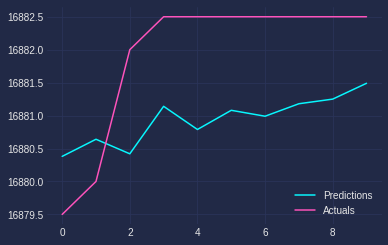

In [23]:
def plot_recursive_predictions(model, X, y, scaler, num_predictions, look_back):

  #now our test_x first value is the last value from the original training data (for us to make future predictions)
  predictions = []
  actuals = []

  for i in range(num_predictions):
    #create a 3 dimensional input using lookback_transformation
    test_x = lookback_transformation(X, look_back)
    # print(test_x.shape)
    test_x = test_x[-1].reshape(1, look_back, -1)
    # print(test_x.shape)


    model_output = model.predict(test_x)
    predictions.append(model_output[:,0])

    X = np.vstack((X, model_output.reshape(1, -1)))
    actuals.append(y[i])

  predictions = list(scaler.inverse_transform(np.array(predictions).reshape(-1,1)))

  predictions =[np.round(x, 2) for x in predictions]
  actuals =[np.round(x, 2) for x in actuals]

  df = pd.DataFrame(data = {'Predictions':predictions, 'Actuals':actuals})
  plt.plot(df['Predictions'])
  plt.plot(df['Actuals'])
  plt.legend(['Predictions', 'Actuals'])
  # plt.ylim([16820, 16840])
  return df, mean_squared_error(actuals, predictions)

train_x = train_scaled[:, :n_input*lag]
test_y = data_supervised_values[-split:, 0]

df, mse = plot_recursive_predictions(model, train_x, test_y, scaler_inv, split, look_back) 

In [24]:
# plt.style.use("cyberpunk")
# plt.figure(figsize=(12, 8))
# (actual,) = plt.plot(test_exp_data, marker = 'x', color = 'white')
# (lstm, ) = plt.plot()

# plt.legend([train1, actual, line1, line2, line3, arima], ['Training', 'Actual Values', fcast1.name, fcast2.name, fcast3.name, 'ARIMA'])
lstm_predictions = df.iloc[:, 0]
mean_squared_error(df.iloc[:, 1], lstm_predictions)

1.7079090118408202

## XGBoost Model - Direct Approach

*   We want to treat this as an auto-regression problem, meaning that we DO NOT want to feed future data into the model when making predictions, BUT we do want to predict for many timesteps out...
*   We also have a multi-variate dataset, meaning that the inputs we have for each prediction, are really predictions in themselves, and might need to be predicted as well
*   In order to do this, there are a few main methods that might work I found:

 1.   Using AutoRegression (or other regression based predictions) to predict univariate values which would be fed into our model for making predictions
 2.   Direct Approach: Fit the regressor for each time point we want to predict. This is essentially its own model per timestep we want to predict.
 3.   Recursive Approach:  Wrap the XGboost with Scikit Learn's MultiOutputRegressor() to get multiple outputs by creating clusters of models that actually predict values individually at each timestep based on the previous value. And then a larger model that predicts the value we actually are focused on (bid/ask price). Rinse & Repeat.





The first option doesn't seem great to me, especially on short-time frames, as the AutoRegression model works on very cyclical data but I don't think we have enough data collected to rely on it very well.


### Boosted Tree Data Preprocessing

In [25]:
xgb_data = data.copy().iloc[:]
xgb_data['timestamp'] = pd.to_datetime(xgb_data['timestamp'], format= '%m_%d_%Y,%H_%M_%S')
xgb_data.drop(columns = ['timestamp'], inplace = True)
xgb_data.drop(columns = ['index', 'bid_liq_.01', 'bid_liq_.03', 'bid_liq_.05', 'ask_liq_.01', 'ask_liq_.01', 'ask_liq_.03', 'ask_liq_.05', 'spread', 'sma'], inplace = True)

xgb_data

,mid_price,bid_price,ask_price,bid_liq_.002,bid_liq_.0033,ask_liq_.002,ask_liq_.0033,dir,log_ret_ask,log_ret_bid,ema
timestamp,,,,,,,,,,,
2022-12-26 01:20:08,16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,27043650.0,1.428574e+09,0,0.000000,0.000000,0.000000
2022-12-26 01:20:18,16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,27043650.0,1.428574e+09,0,0.000000,0.000000,0.000000
2022-12-26 01:21:41,16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,27043650.0,1.428574e+09,0,0.000000,0.000000,0.000000
2022-12-26 01:22:11,16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,27043650.0,1.428574e+09,0,0.000000,0.000000,0.000000
2022-12-26 01:22:41,16830.0,16850.0,16840.00,1.323464e+09,1.405543e+09,27043650.0,1.428574e+09,0,0.000000,0.000000,16830.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 21:00:41,16882.5,16897.0,16889.75,6.754584e+10,6.894599e+10,130374300.0,1.540508e+09,0,-0.000044,-0.000089,16882.079848
2022-12-26 21:01:11,16882.5,16897.0,16889.75,6.753571e+10,6.893586e+10,140512500.0,1.550646e+09,0,0.000000,0.000000,16882.219899
2022-12-26 21:01:41,16882.5,16897.0,16889.75,6.753571e+10,6.893586e+10,140512300.0,1.550646e+09,0,0.000000,0.000000,16882.313266


In [26]:
 #scale data using minmax scaler
def scale_data(train, test):
  scaler = MinMaxScaler(feature_range = (-1,1))
  scaler = scaler.fit(np.array(train))

  train = np.array(train).reshape(train.shape[0], train.shape[1])
  train_scaled = scaler.transform(train)

  test = np.array(test).reshape(test.shape[0], test.shape[1])
  test_scaled = scaler.transform(test)

  return scaler, train_scaled, test_scaled

def invert_scale(scaler, X, yhat):
  new_row = [x for x in X] + [yhat]
  array = np.array(new_row)
  array = array.reshape(1, len(array))
  inverted = scaler.inverse_transform(array)
  return inverted[0,-1]

In [27]:
#frame sequences as a supervised learning problem
def timeseries_to_supervised(data, lag = 1):
  df = data
  columns = [df.shift(i) for i in range(1, lag+1)]
  df = df.rename(columns = {'mid_price': 'label_mid_price'})
  columns.append(df['label_mid_price'])
  df = pd.concat(columns, axis = 1)
  return df

def label_data(data, features):
  #create "labelled" data
  supervised_data = timeseries_to_supervised(data, features)

  # remove the number of rows = to the number of lag features
  supervised_values = supervised_data.iloc[features:, :] 

  return supervised_values

def split_data(data_X, data_y, split):
  #train test split
  train_X, train_y = data_X.iloc[0:-split, :], data_y[0:-split]
  test_X, test_y = data_X.iloc[-split, :], data_y[-split:]

  return train_X, train_y, test_X, test_y

def make_direct_datasets(data, prediction_horizon):
  #Conduct Direct predictions
  direct_dataset_X = data.copy().drop(columns = ['label_mid_price'])
  direct_dataset_X.columns = pd.io.parsers.base_parser.ParserBase({'names':direct_dataset_X.columns, 'usecols':None})._maybe_dedup_names(direct_dataset_X.columns)

  direct_datasets_y = []
  for i in range(prediction_horizon):
    df = data.copy()
    label = df.label_mid_price.shift(-(i))
    y = label

    direct_datasets_y.append(y)

  return direct_dataset_X, direct_datasets_y


Unlike the LSTM, we do not need to scale or normalize our data because XGBoost is an ensemble of many decision trees, which do not require scaling either.

Meaning that any application of monotonic functions won't really affect our output






In [28]:
#take out the test
#now with just the train, we want to use just 70% of the data with validation, and slide it to the right in 6% increments

#now we can tune parameters using the results

### Boosted Tree Model with Direct Approach

In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.model_selection import GridSearchCV

In [30]:
#use shift -1 on just the label column for each one 
#so then for the range we train a model on each version and conglomerate the results

Hyperparameters:


*   Objective Function: We are using mean squared error, and we need the first two derivatives based on that error. 
  * So the function should return the gradient(first order derivative) and the [hessian matrix](https://en.wikipedia.org/wiki/Hessian_matrix) 



In [31]:
# #Mean Squared Error objective function
# def mse(y_pred, y_val):
#     # l(y_val, y_pred) = (y_val-y_pred)**2
#     grad = 2*(y_val-y_pred)
#     hess = np.repeat(2,y_val.shape[0]) #Describes the local curviture of a function
#       #Hessian matrix can be used to discover saddlepoints and local extremum
#     return grad, hess

def train_model(X_train, y_train):
  #Create model
  estimator = XGBRegressor(objective = 'reg:squarederror',
                          seed = model_seed,
                          n_estimators = n_estimators,
                          max_depth = max_depth,
                          learning_rate = learning_rate,
                          min_child_weight = min_child_weight,
                          subsample=subsample,
                          colsample_bytree=colsample_bytree,
                          colsample_bylevel=colsample_bylevel,
                          gamma=gamma)

  #Train model
  estimator.fit(X_train, y_train)

  return estimator

def create_direct_models(prediction_horizon, X_dataset, y_datasets, split):
#run the model and get results  
  #initialize list to hold the different models we create
  estimator_list = []
  X = X_dataset

  for i in range(prediction_horizon):
    print('Creating estimator for t+{}'.format(i+1))
    y = y_datasets[i]
    X_train, y_train, X_test, y_test = split_data(X, y, split)

    X_train = X_train.to_numpy()
    y_train = np.array(y_train)
    X_test = X_test.to_numpy()
    y_test = np.array(y_test)

    estimator = train_model(X_train, y_train)
    estimator_list.append(estimator)

  return estimator_list

def create_datasets(xgb_data, features, prediction_horizon):
  values = label_data(timeseries_to_supervised(xgb_data), features)
  X_dataset, y_datasets = make_direct_datasets(values, prediction_horizon)
  return X_dataset, y_datasets, values

def create_estimators(xgb_data, prediction_horizon, split, features):
  X_dataset, y_datasets, values = create_datasets(xgb_data, features, prediction_horizon)
  estimator_list = create_direct_models(prediction_horizon, X_dataset, y_datasets, split)
  return estimator_list, values, X_dataset

def get_predictions(estimator_list, values, X_dataset, prediction_horizon):
  predictions = []
  actuals = values.iloc[-prediction_horizon:, -1]
  for i in range(len(estimator_list)):
    model = estimator_list[i]
    predictions.append(model.predict(pd.DataFrame(X_dataset.iloc[-prediction_horizon, :]).T.to_numpy()))

  return predictions, actuals


In [32]:
split = 10 #for this it makes the most sense to me to have this equal to our prediction horizon
features = 20 #timesteps of lag features
prediction_horizon = split

model_seed = 42
n_estimators = 300
max_depth = 6
learning_rate = 0.1
min_child_weight = 1         
subsample = 0.8           
colsample_bytree = 0.8      
colsample_bylevel = 1   
gamma = 1

estimator_list, all_values, X_dataset = create_estimators(xgb_data, prediction_horizon, split, features)
predictions, actuals = get_predictions(estimator_list, all_values, X_dataset, prediction_horizon)

Creating estimator for t+1
Creating estimator for t+2
Creating estimator for t+3
Creating estimator for t+4
Creating estimator for t+5
Creating estimator for t+6
Creating estimator for t+7
Creating estimator for t+8
Creating estimator for t+9
Creating estimator for t+10


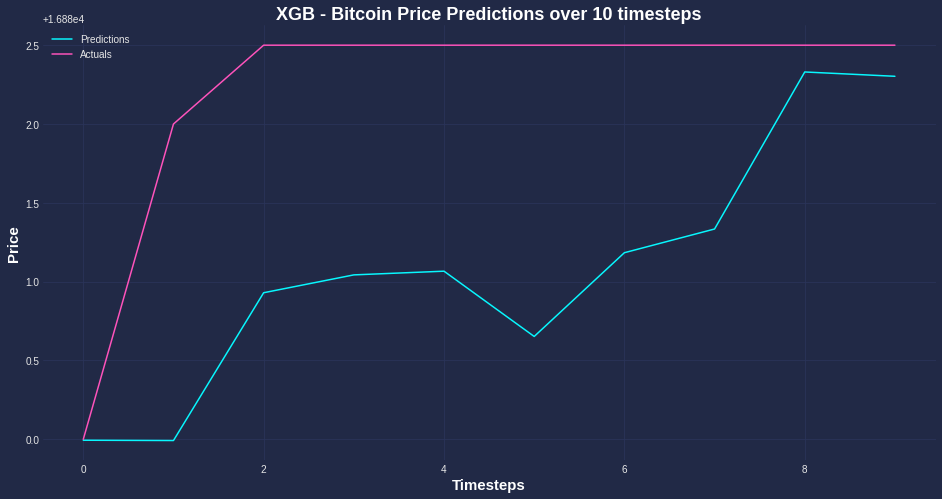

In [33]:
plt.style.use("cyberpunk")
plt.rcParams['figure.figsize'] = (16,8)

plt.title('XGB - Bitcoin Price Predictions over 10 timesteps', fontsize = 18,fontweight = 'bold', color = 'white')

plt.xlabel('Timesteps', fontsize = 15, color = 'white',fontweight = 'bold')
plt.ylabel('Price', fontsize = 15, color = 'white',fontweight = 'bold')

plt.plot(predictions)
plt.plot(np.array(actuals))
plt.legend(['Predictions', 'Actuals'])

We purposely included a lot of features that are able to smooth out the data more, and avoid any very volatile movements. As you can see, our predictions seem sensitive to sharp jumps, but do a great job of capturing the general trend of the data

In comparison to other models, it seems like we are getting the best results with XGBoost!

In [34]:
#Let's reset the index of our predictions to be on the same scale as ther models
index = line1.get_xdata()
predictions = pd.DataFrame(predictions).set_index(index)
xgb_predictions = predictions

lstm_predictions = pd.DataFrame(lstm_predictions).set_index(index)

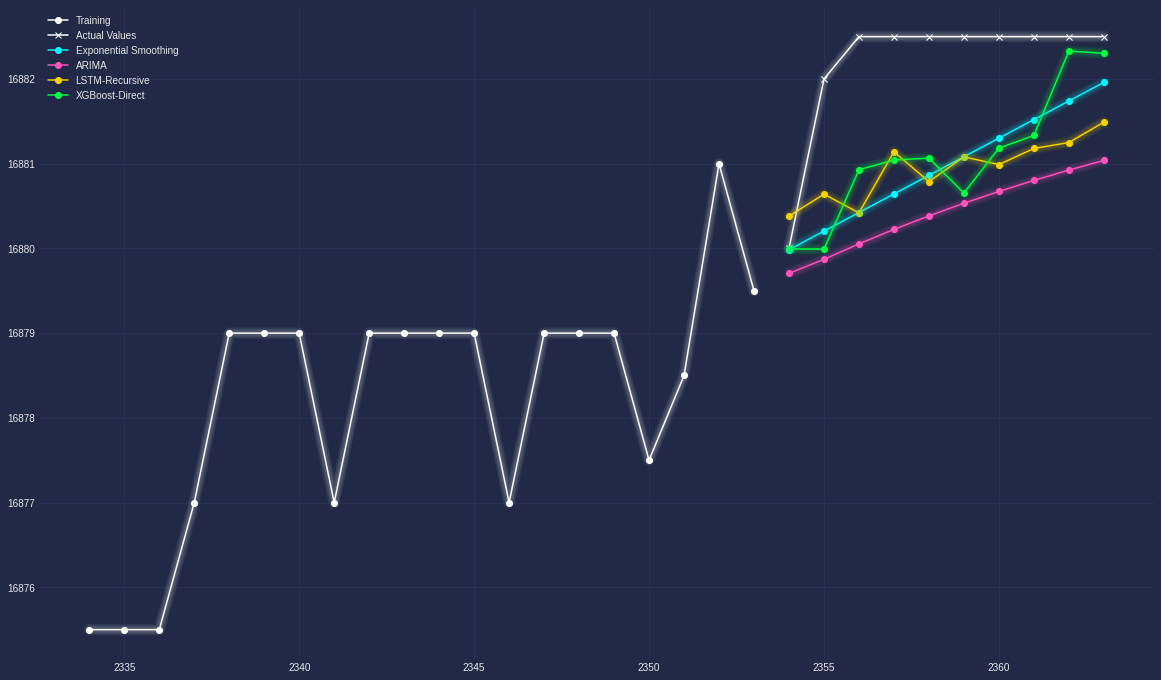

In [35]:
plt.style.use("cyberpunk")
plt.figure(figsize=(20, 12))

#Let's just keep the best performers
(train1,) = plt.plot(exp_data[-(exp_split * 2):], marker="o", color="white")
(actual,) = plt.plot(test_exp_data, marker = 'x', color = 'white')
# (line1,) = plt.plot(fcast1, marker="o")
(line2,) = plt.plot(fcast2, marker="o")
# (line3,) = plt.plot(fcast3, marker="o")
(arima,) = plt.plot(arima_predictions, marker="o")
(lstm, ) = plt.plot(lstm_predictions, marker = "o")
(xgb, ) = plt.plot(xgb_predictions, marker = "o")

plt.legend([train1, actual, line2, arima, lstm, xgb], ['Training', 'Actual Values', 'Exponential Smoothing',  'ARIMA', 'LSTM-Recursive', 'XGBoost-Direct'])

mplcyberpunk.make_lines_glow()

Now let's compare all the mean squared errors of our models

In [45]:
arima_predictions

2353             NaN
2354    16879.705878
2355    16879.871226
2356    16880.053708
2357    16880.224378
2358    16880.383969
2359    16880.533169
2360    16880.672628
2361    16880.802953
2362    16880.924714
2363    16881.038450
dtype: float64

In [47]:
from sklearn.metrics import mean_squared_error
model_names = [fcast1.name, fcast2.name, fcast3.name, 'ARIMA', 'XGBoost-Direct', 'LSTM']
model_predictions = [fcast1, fcast2, fcast3, arima_predictions, xgb_predictions, lstm_predictions]

for i in range(len(model_names)):
  mse = mean_squared_error(test_exp_data, model_predictions[i])
  print(model_names[i], '- MSE:', mse)


Holt DES - $\alpha=0.3$ - MSE: 1.8332256633965414
Holt DES - $\alpha=0.8$ - MSE: 1.8934851636135928
TES - $\alpha=0.8889285711753961$ - MSE: 2.961674469451218
ARIMA - MSE: 3.4963910563901406
XGBoost-Direct - MSE: 1.7249496459960938
LSTM - MSE: 1.9715808868408202


#### Now let's look at how we performed on the training data

*   Because we trained many models we have to look at them individually



In [48]:
#subplots

#my guess is that while it seemed to perform pretty well, especially in just capturing the overall trend.
  #You can see this section of data happens to be fairly smooth (which we ha)

Because the XGBoost model seemed to perform the best out of all the different models, let's see how it performs on a larger time frame

*   Build 40 estimators to predict 40 timesteps, or 20 minutes into the future
*   Using the same parameters but resetting the model_seed



Creating estimator for t+1
Creating estimator for t+2
Creating estimator for t+3
Creating estimator for t+4
Creating estimator for t+5
Creating estimator for t+6
Creating estimator for t+7
Creating estimator for t+8
Creating estimator for t+9
Creating estimator for t+10
Creating estimator for t+11
Creating estimator for t+12
Creating estimator for t+13
Creating estimator for t+14
Creating estimator for t+15
Creating estimator for t+16
Creating estimator for t+17
Creating estimator for t+18
Creating estimator for t+19
Creating estimator for t+20
Creating estimator for t+21
Creating estimator for t+22
Creating estimator for t+23
Creating estimator for t+24
Creating estimator for t+25
Creating estimator for t+26
Creating estimator for t+27
Creating estimator for t+28
Creating estimator for t+29
Creating estimator for t+30
Creating estimator for t+31
Creating estimator for t+32
Creating estimator for t+33
Creating estimator for t+34
Creating estimator for t+35
Creating estimator for t+36
C

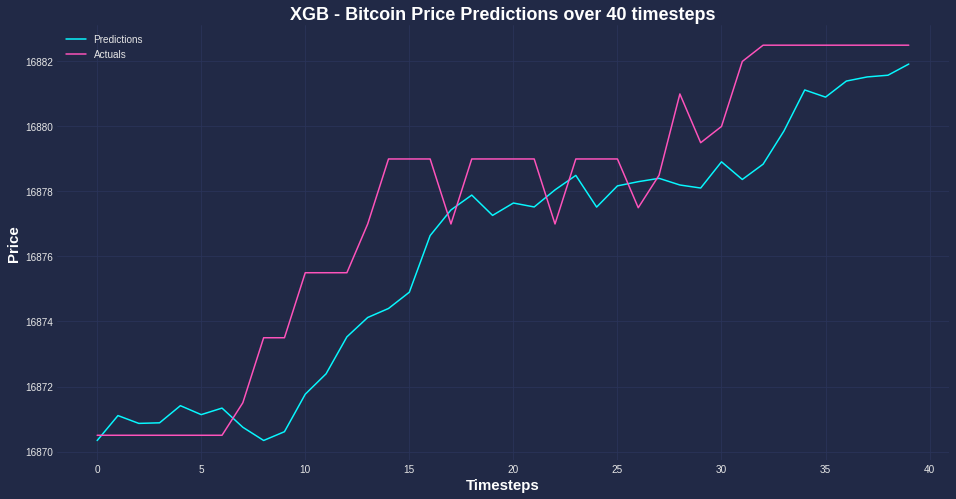

In [50]:
model_seed = 42
n_estimators = 300
max_depth = 6
learning_rate = 0.1
min_child_weight = 1         
subsample = 0.8           
colsample_bytree = 0.8      
colsample_bylevel = 1   
gamma = 1

split = 40 #for this it makes the most sense to me to have this equal to our prediction horizon
features = 20 #timesteps of lag features
prediction_horizon = split

estimator_list, all_values, X_dataset = create_estimators(xgb_data, prediction_horizon, split, features)
predictions, actuals = get_predictions(estimator_list, all_values, X_dataset, prediction_horizon)

plt.style.use("cyberpunk")
plt.rcParams['figure.figsize'] = (16,8)

plt.title('XGB - Bitcoin Price Predictions over 40 timesteps', fontsize = 18,fontweight = 'bold', color = 'white')

plt.xlabel('Timesteps', fontsize = 15, color = 'white', fontweight = 'bold')
plt.ylabel('Price', fontsize = 15, color = 'white', fontweight = 'bold')

plt.plot(predictions)
plt.plot(np.array(actuals))
plt.legend(['Predictions', 'Actuals'])